<a href="https://colab.research.google.com/github/JuanJCL/ProyectoAdmRiesgo/blob/main/Proyecto_Riesgos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar librerias

Importamos las librerias

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px1

# Datos acciones

In [2]:
# Nombre acciones
nombre_acciones = ['OMAB.MX', 'CEMEXCPO.MX', 'Q.MX', 'MELIN.MX', 'FIBRAPL14.MX', 'KOFUBL.MX', 'LABB.MX', 'ACTINVRB.MX',"BBAJIOO.MX","LIVEPOLC-1.MX"]

In [3]:
#creamos una lista vacía
recolector = []

#inicamos con un for que intere sobre cada activo
for nemo in nombre_acciones: # Added colon

#creamos "ticker" con ayuda de YF obtenemos acceso a a esa inf

    ticker =yf.Ticker(nemo) # Added indentation

#utilizamos .history

    px= ticker.history(period="2y")['Close'] # Added indentation

#asignar el nombre de los precios descargados (funciona como una especie de iD)

    px.name = nemo # Added indentation
    recolector.append(px) # Changed += to .append()

## Precio

In [4]:
# Rellenamos los valores NaN
precios = pd.concat(recolector, axis=1)

precios = precios.ffill()

# ¿Cuánto vamos a invertir?
# Creamos otra variable

monto = 250000
monto_inversion = '${:,f}'.format(monto)

# Nivel de confianza

nivel_confianza = 99
print("Nivel de confianza del: ", nivel_confianza, "%")

# Precio actual
precio_actual_activos = precios.iloc[-1]
precio_actua_activos = precios.iloc[-2]


# COnvertimos de pd.series a pd.dataframe
precio_activos = precio_actual_activos.squeeze()
precio_activos_dinero = precio_activos.apply('${:,.2f}'.format)

Nivel de confianza del:  99 %


## Rendimientos

In [5]:
# Rendimientos ln(i/i-1)

# .shift desplaza una fila hacia abajo
rendimientos = np.log(precios.shift(1) / precios)

# Quitamos el NaN usando el dropna
rendimientos = rendimientos.dropna()
rendimientos


# Número de días cotizados y num activos
num_filas = len(rendimientos.axes[0])
num_columnas = len(rendimientos.axes[1])

# Esperanza
esperanza_activo = rendimientos.mean()
# Lo convertimos en porcentaje
esperanza_activo_porcentaje = esperanza_activo * 100
esperanza_activo_porcentaje = esperanza_activo_porcentaje.apply('{:,.5f}%'.format)
esperanza_activo_porcentaje

,0
OMAB.MX,-0.02887%
CEMEXCPO.MX,-0.02890%
Q.MX,-0.11522%
MELIN.MX,-0.10078%
FIBRAPL14.MX,-0.03724%
KOFUBL.MX,-0.06371%
LABB.MX,-0.13583%
ACTINVRB.MX,-0.09074%
BBAJIOO.MX,0.01297%
LIVEPOLC-1.MX,0.01308%


## Varianza

In [6]:
# Varianzas
var_activo = rendimientos.std()

# Lo convertimos en porcentaje
var_activo_porcentaje = var_activo * 100
var_activo_porcentaje = var_activo_porcentaje.apply('{:,.5f}%'.format)
var_activo_porcentaje

,0
OMAB.MX,2.58735%
CEMEXCPO.MX,2.08198%
Q.MX,2.04979%
MELIN.MX,2.46239%
FIBRAPL14.MX,1.84430%
KOFUBL.MX,1.48524%
LABB.MX,2.10180%
ACTINVRB.MX,1.01521%
BBAJIOO.MX,2.01344%
LIVEPOLC-1.MX,1.42570%


## Esperanza y riesgo

In [7]:
# Esperanza y riesgo en una tabla

df = pd.DataFrame(columns=nombre_acciones, index = {'Esperanza activo': esperanza_activo_porcentaje, 'Varianza activo': var_activo_porcentaje})
df.loc["Esperanza activo"] = esperanza_activo_porcentaje
df.loc["Varianza activo"] = var_activo_porcentaje
df.T

,Esperanza activo,Varianza activo
OMAB.MX,-0.02887%,2.58735%
CEMEXCPO.MX,-0.02890%,2.08198%
Q.MX,-0.11522%,2.04979%
MELIN.MX,-0.10078%,2.46239%
FIBRAPL14.MX,-0.03724%,1.84430%
KOFUBL.MX,-0.06371%,1.48524%
LABB.MX,-0.13583%,2.10180%
ACTINVRB.MX,-0.09074%,1.01521%
BBAJIOO.MX,0.01297%,2.01344%
LIVEPOLC-1.MX,0.01308%,1.42570%


In [8]:
df_activos_inf = pd.DataFrame(columns=nombre_acciones, index = ["Precio de los activos", "Esperanza activo", "Riesgo del activo", "VaR parametrico"])
df_activos_inf.loc["Precio de los activos"] = precio_activos_dinero
df_activos_inf.loc["Esperanza activo"] = esperanza_activo_porcentaje
df_activos_inf.loc["Riesgo del activo"] = var_activo_porcentaje
#df_activos_inf.loc["VaR parametrico"] = VaR

df_activos_inf.T

,Precio de los activos,Esperanza activo,Riesgo del activo,VaR parametrico
OMAB.MX,$202.25,-0.02887%,2.58735%,NaN
CEMEXCPO.MX,$11.10,-0.02890%,2.08198%,NaN
Q.MX,$183.36,-0.11522%,2.04979%,NaN
MELIN.MX,"$38,730.00",-0.10078%,2.46239%,NaN
FIBRAPL14.MX,$68.06,-0.03724%,1.84430%,NaN
KOFUBL.MX,$193.21,-0.06371%,1.48524%,NaN
LABB.MX,$25.34,-0.13583%,2.10180%,NaN
ACTINVRB.MX,$18.50,-0.09074%,1.01521%,NaN
BBAJIOO.MX,$49.58,0.01297%,2.01344%,NaN
LIVEPOLC-1.MX,$98.58,0.01308%,1.42570%,NaN


## Tasa cetes

In [17]:
# Tasa libre de riesgo

tasa_cetes = 0.10/252

# Tabla excedentes
excedentes = esperanza_activo - tasa_cetes

## Matriz varianzas y covarianzas

In [18]:
# Matriz de varianzas y covarianzas
matriz_var_principal = np.cov(rendimientos, y = None, rowvar=0, bias=True, ddof=None, fweights=None, aweights=None, dtype=None)
matriz_var_principal

# Matriz con 1
# Agregamos con .insert
matriz_var1 = np.insert(matriz_var_principal,num_columnas,1,axis=1)
matriz_var1 = np.insert(matriz_var1,num_columnas,1,axis=0)
matriz_var1

# Matriz con cero

matriz_var1[num_columnas,num_columnas] = "0"

# Matriz inversa
# Matriz inversa con unos y ceros
matriz_var_inversa = np.linalg.inv(matriz_var1)

# Portafolio de rendimiento deseado

In [19]:
# Portafolio de rendimiento deseado
# Este portafolio calcula el rendimiento con el cual estamos "cómodos"

# Agregamos las "esperanzas" necesarias

# Primero para operar convertimos a np. las esperanzas

esperanza = np.array(esperanza_activo)
esperanza_con_cero = np.insert(esperanza, num_columnas,[0],axis=0)

# Agregamos el segundo cero
esperanza_con_zeros = np.insert(esperanza_con_cero, num_columnas, [0],axis=0)

# Agregamos lo anterior a nuestra matriz
matriz_rend = np.insert(matriz_var1, num_columnas+1, esperanza_con_cero, axis=1)
matriz_rend = np.insert(matriz_rend, num_columnas+1, esperanza_con_zeros, axis=0)

# Definimos el rendimiento deseado EN DECIMAL
rend_deseado = 0.15 / 252

# Sacamos la inversa de la matriz anterior
matriz_rend_inversa = np.linalg.inv(matriz_rend)

# Tomamos la última columna de la matriz inv con rend
submatrizA = matriz_rend_inversa[-1]

# Multiplicamos la columna amnterior por el rend deseado
mult_submatriz = rend_deseado * submatrizA


submarizB = matriz_rend_inversa[-2]

# A dicho resultado sumamos la penúltima columna
suma_columnasAB = mult_submatriz + submarizB

wi_rend_dado = suma_columnasAB[:num_columnas]
wi_rend_dado

# Corroboramos dicha esperanza
esp_port_rend_dado = np.matmul(wi_rend_dado, esperanza_activo)

# Lo convertimos a porcentaje

esp_port_rend_dado = esp_port_rend_dado * 100
esp_port_rend_dado_porcentaje = '{:,.5f}%'.format(esp_port_rend_dado)

# Sacar la varianza del portafolio
var_port_rend_dado = np.square(np.matmul(wi_rend_dado, np.matmul(matriz_var_principal, wi_rend_dado)))

# Lo convertimos a porcentaje
var_port_rend_dado_porcentaje = var_port_rend_dado * 100
var_port_rend_dado_porcentaje = '{:,.10f}%'.format(var_port_rend_dado)

print(var_port_rend_dado)
#var_port_rend_dado_porcentaje

# Mostramos un dataframe para las asignaciones
df_wi_rend_dado = pd.DataFrame(columns=nombre_acciones, index = ["Asignacion de los activos"])
df_wi_rend_dado.loc["Asignacion de los activos"] = wi_rend_dado
print(df_wi_rend_dado.T)

# Colocamos los pesos, la esperanza y la varianza en una tabla
df_port_rend_dado=pd.DataFrame(columns = ["Riesgo y esperanza"], index = ["Esperanza del portafolio", "Riesgo del portafolio"])
df_port_rend_dado.loc["Esperanza del portafolio"] = esp_port_rend_dado_porcentaje
df_port_rend_dado.loc["Riesgo del portafolio"] = var_port_rend_dado_porcentaje

df_port_rend_dado




5.62858322423643e-08
              Asignacion de los activos
OMAB.MX                        0.038699
CEMEXCPO.MX                    0.117665
Q.MX                          -0.259198
MELIN.MX                      -0.037049
FIBRAPL14.MX                   0.141246
KOFUBL.MX                      0.129937
LABB.MX                       -0.293485
ACTINVRB.MX                    0.106454
BBAJIOO.MX                      0.27381
LIVEPOLC-1.MX                   0.78192


,Riesgo y esperanza
Esperanza del portafolio,0.05952%
Riesgo del portafolio,0.0000000563%


In [20]:
print(matriz_var_principal)

[[ 6.68100542e-04  1.47137477e-04  4.82974171e-05  2.60774010e-05
   6.73797945e-05  4.17776924e-05  9.22476189e-05 -7.82364281e-06
   1.23154787e-04  6.55478962e-05]
 [ 1.47137477e-04  4.32597243e-04  4.85478770e-05  1.70052032e-05
   5.10777983e-05  6.99997936e-05  7.13579543e-05 -5.83122561e-06
   5.69713532e-05  6.12983074e-05]
 [ 4.82974171e-05  4.85478770e-05  4.19324893e-04  1.10441651e-06
   5.20562373e-05  2.62304937e-05  5.88283461e-05 -6.03978777e-06
   7.29777908e-05  7.36780212e-05]
 [ 2.60774010e-05  1.70052032e-05  1.10441651e-06  6.05123526e-04
  -1.46963187e-05  4.57350124e-05 -3.07848078e-06 -1.00146282e-05
   1.86107592e-05  2.98753970e-06]
 [ 6.73797945e-05  5.10777983e-05  5.20562373e-05 -1.46963187e-05
   3.39463216e-04  2.75613419e-05  7.90864521e-05 -4.91315519e-06
   1.08919467e-04  4.55053844e-05]
 [ 4.17776924e-05  6.99997936e-05  2.62304937e-05  4.57350124e-05
   2.75613419e-05  2.20153319e-04  4.89710379e-05 -1.03127016e-05
   3.59846223e-05  2.56156407e-05

# Portafolio de mercado

In [21]:
print("Suma de pesos del portafolio:", np.sum(transponer_M))

NameError: name 'transponer_M' is not defined

In [22]:
#portafolio de mercado(m)

#sacar la inversa de la matriz principal (sin ceros ni unos)
matriz_inv_var = np.linalg.inv(matriz_var_principal)

#multiplicamos la matriz inv que sacamos con excedentes de rendimientos
matriz_mult = np.matmul(matriz_inv_var, excedentes)

#hacemos la suma de dicha operacion
suma_matriz = sum(matriz_mult)

#dividimos lo anterior
div_matriz_M = matriz_mult/suma_matriz

#transponemos y obtenemos Wi del portafolio M
transponer_M = np.transpose(div_matriz_M)

#sacamos la esperanza del portafolio
esp_port_M = np.matmul(transponer_M, esperanza_activo)

#lo convertimos a porcentaje
esp_port_M_porcentaje = esp_port_M*100
esp_por_M_porcentaje = "{:,.5f}%".format(esp_port_M_porcentaje)

#sacamos el riesgo del port M
var_port_M = np.sqrt(np.matmul(transponer_M, np.matmul(matriz_var_principal, transponer_M)))

#lo convertimos a porcentaje
var_port_M_porcentaje = var_port_M*100
var_port_M_porcentaje = "{:,.10f}%".format(var_port_M_porcentaje)

#DF riesgo y rendimiento
df_port_M = pd.DataFrame(columns=["Riesgo y esperanza"], index = ["Esperanza del portafolio", "Riesgo del portafolio"])
df_port_M.loc["Esperanza del portafolio"] = esp_por_M_porcentaje
df_port_M.loc["Riesgo del portafolio"] = var_port_M_porcentaje
df_port_M

#DF asignacion
df_Wi_M = pd.DataFrame(columns=nombre_acciones, index = ["Asignacion de los activos"])
df_Wi_M.loc["Asignacion de los activos"] = transponer_M
df_Wi_M.T

,Asignacion de los activos
OMAB.MX,0.008318
CEMEXCPO.MX,0.005263
Q.MX,0.121891
MELIN.MX,0.08735
FIBRAPL14.MX,0.047216
KOFUBL.MX,0.13769
LABB.MX,0.132934
ACTINVRB.MX,0.522258
BBAJIOO.MX,-0.03157
LIVEPOLC-1.MX,-0.03135


# Portafolio minímo riesgo

In [23]:
#CALCULAR EL PORTAFOLIO DE MINIMO RIESGO
#Data frame de esperanza y riesgo
#Data frame con las Wi (activos)

# Matriz de varianzas y covarianzas
matriz_inv_var = np.linalg.inv(matriz_var_principal)
uno = np.ones(len(matriz_inv_var))

# Pesos del portafolio de mínimo riesgo
wi_min_riesgo = np.matmul(matriz_inv_var, uno) / np.matmul(uno.T, np.matmul(matriz_inv_var, uno))

# Esperanza del portafolio de mínimo riesgo
esp_port_min_riesgo = np.matmul(wi_min_riesgo, esperanza_activo) * 100

# Riesgo del portafolio de mínimo riesgo
var_port_min_riesgo = np.sqrt(np.matmul(wi_min_riesgo, np.matmul(matriz_var_principal, wi_min_riesgo))) * 100

# Crear el DataFrame con la información
df_port_min_riesgo = pd.DataFrame({
    "Asignación de los activos": wi_min_riesgo
}, index=precios.columns)

df_port_min_riesgo.loc["Esperanza del Portafolio"] = "{:,.5f}%".format(esp_port_min_riesgo)
df_port_min_riesgo.loc["Riesgo del Portafolio"] = "{:,.5f}%".format(var_port_min_riesgo)

df_port_min_riesgo

,Asignación de los activos
OMAB.MX,0.01428
CEMEXCPO.MX,0.027319
Q.MX,0.047111
MELIN.MX,0.06294
FIBRAPL14.MX,0.065667
KOFUBL.MX,0.136169
LABB.MX,0.049259
ACTINVRB.MX,0.440666
BBAJIOO.MX,0.028354
LIVEPOLC-1.MX,0.128236


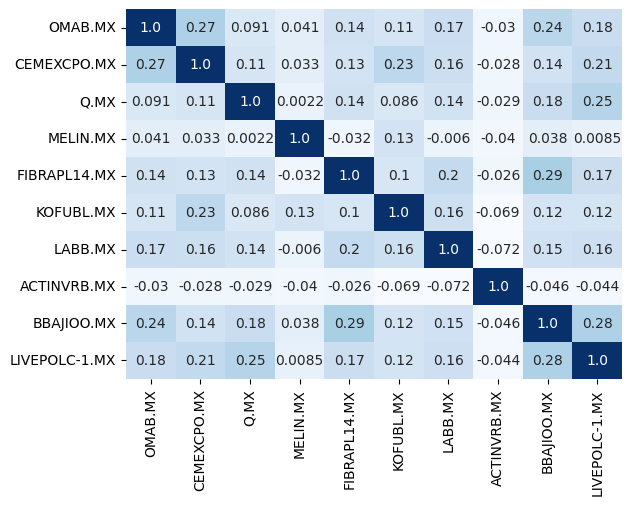

In [24]:
# Creamos una lista numerada con los rendimientos

list_rend = [rendimientos[i] for i in rendimientos]

#grafico de claor para ver la correlacion de lso activos

rendimientos_corr=rendimientos.corr()
sns.heatmap(rendimientos_corr, annot = True, cmap = "Blues", cbar = False, fmt = ".2")

#annot = TRUE muestra los valroes de correclaciòn dentro del gràfico
#cmap = "blues" paleta de colores
#char = FALSE ocult barra de color
#ftm = "0.2" correlacòn con dos decimales

plt.show()

# Simulación de portafolios

In [25]:
##creando numeros aleatorios
pesos_ws = pd.DataFrame(columns=nombre_acciones)
#numero de instrumentos
m = num_columnas
for i in range(500):
  #generamos m randoms
  pesos_ws.loc[i] = np.random.rand(m)
  #estandarizamos (suma = 1)
  pesos_ws.loc[i] = pesos_ws.loc[i]/np.sum(pesos_ws.loc[i])


def varianza_portafolio(W,MVCV): #W = pesos, RA = rendimiento de activos, MVCV = matriz varianzas y covarianzas
  #se trata de la suma xixjcovij
  sum_ = 0
  series = pd.DataFrame(W).index
  for i in series:
    for j in series:
      sum_ = sum_ + W[i] * MVCV[i][j] * W[j]
  return sum_


def rendimiento_portafolio(W,RI):
  sum_ = 0
  series = pd.DataFrame(W).index
  for i in series:
    sum_ = sum_ + W[i] * RI[i]
  return sum_

VARs = []
RENs = []
#RHOs = []

MVCV = rendimientos.cov()
RI = esperanza_activo


#multiplicamos por 30 para estandarizarlo a 30 dias, pues para este ejercicio ocuparemos cetes28


for i in range(len(pesos_ws)):
  W = pesos_ws.iloc[i]
  var = np.sqrt(varianza_portafolio(W,MVCV)*252)*100
#  var = np.sqrt(varianza_portafolio(W,MVCV)*30)*100
  ren = rendimiento_portafolio(W,RI)*100*252
#  ren = rendimiento_portafolio(W,RI)*100*30

  #rho = ren/var
  VARs.append(var)
  RENs.append(ren)
# RHOs.append(ren)

  #agregamos
  VARs.append(0)
  RENs.append(tasa_cetes*100*252)


  VARs.append(var_port_M*100*np.sqrt(252))
  RENs.append(esp_port_M*100*252)
  #RHOs.append(esp_port_M*100*252)

#  VARs.append(var_port_M2*100*np.sqrt(252))
#  RENs.append(esp_port_M2*100*252)
#  RHOs.append(esp_port_M2*100*252)


  VARs.append(var_port_min_riesgo*100*np.sqrt(252))
  RENs.append(esp_port_min_riesgo*100*252)
  #RHOs.append(esp_port_MR*100*252)

  #VARs.append(var_port_rend_dado*100*np.sqrt(30))
  #RENs.append(esp_port_rend_dado*100*30)
  #RHOs.append(esp_port_rend_dado*100*30)

df_Tasas = pd.DataFrame(list(zip(VARs, RENs)),columns =['% Desviación', '% Rendimiento'])
df_Tasas = df_Tasas[['% Desviación', '% Rendimiento']]

a = tasa_cetes*100*252
m = (esp_port_M*252-tasa_cetes*252)/(var_port_M*np.sqrt(252))

x_range = np.linspace(df_Tasas['% Desviación'].min(), df_Tasas['% Desviación'].max(), 100)

y_range = a + m * x_range

In [26]:
fig = px1.scatter(df_Tasas, x ='% Desviación', y ='% Rendimiento', title = "Simulación de portafolios")

fig.add_trace(go.Scatter(x=x_range, y=y_range, mode = "lines", name= "LMC y = a+mx"))

fig.show()

In [27]:
df_port_M

,Riesgo y esperanza
Esperanza del portafolio,-0.10004%
Riesgo del portafolio,0.7232239364%


In [28]:
####VAR PARAMETRICO
import scipy.stats as stats
###DESPUES DE LA ESP Y VAR

alpha = 1-  nivel_confianza/100
z_alpha_2 = stats.norm.ppf(1-alpha/2)

VaR_Par_activo = z_alpha_2 * var_activo * precio_activos
VaR_Par_dinero = VaR_Par_activo.apply('${:,.2f}'.format)

df_VaR_Par = pd.DataFrame(columns=nombre_acciones, index = ["VaR parametrico"])
df_VaR_Par.loc["VaR parametrico"] = VaR_Par_dinero
df_VaR_Par.T

,VaR parametrico
OMAB.MX,$13.48
CEMEXCPO.MX,$0.60
Q.MX,$9.68
MELIN.MX,"$2,456.53"
FIBRAPL14.MX,$3.23
KOFUBL.MX,$7.39
LABB.MX,$1.37
ACTINVRB.MX,$0.48
BBAJIOO.MX,$2.57
LIVEPOLC-1.MX,$3.62


In [40]:
#### abajo del porta var_por_M

posicion_M_activos = np.floor(abs(transponer_M * float(monto_inversion.replace('$', '').replace(',', '')))/precio_activos)

posicion_M_port =  sum(posicion_M_activos)

monto_real_inv = sum(posicion_M_activos * precio_activos)
monto_real_inv_dinero = '${:,.2f}'.format(monto_real_inv)

val_M_activos = posicion_M_activos * precio_activos
val_M_activos_dinero = ['${:,.2f}'.format(i) for i in val_M_activos]

#VaR portafolio

VaR_Par_M = z_alpha_2 * var_port_M * precio_activos
VaR_Par_M_dinero = VaR_Par_M.apply('${:,.2f}'.format)

#VaR *Wi x titulos
VaR_par_activos_M = z_alpha_2 * var_port_M * posicion_M_activos
VaR_par_activos_M_dinero = VaR_par_activos_M.apply('${:,.2f}'.format)


#VaR no diversificado
VaR_par_nd =sum(VaR_par_activos_M)
VaR_par_nd_dinero = '${:,.2f}'.format(VaR_par_nd)


In [46]:
df_port_M = pd.DataFrame(columns=nombre_acciones, index = ["Precio de los activos", "Esperanza activo", "Riesgo del activo", "VaR parametrico","VaR no diversificado"])
df_port_M.loc["Precio de los activos"] = posicion_M_activos
df_port_M.loc["Esperanza activo"] =esp_por_M_porcentaje
df_port_M.loc["Riesgo del activo"] = var_port_M_porcentaje
df_port_M.loc["VaR parametrico"] = VaR_Par_M_dinero
df_port_M.loc["VaR no diversificado"] = VaR_par_nd_dinero
df_port_M


,OMAB.MX,CEMEXCPO.MX,Q.MX,MELIN.MX,FIBRAPL14.MX,KOFUBL.MX,LABB.MX,ACTINVRB.MX,BBAJIOO.MX,LIVEPOLC-1.MX
Precio de los activos,10.0,118.0,166.0,0.0,173.0,178.0,1311.0,7057.0,159.0,79.0
Esperanza activo,-0.10004%,-0.10004%,-0.10004%,-0.10004%,-0.10004%,-0.10004%,-0.10004%,-0.10004%,-0.10004%,-0.10004%
Riesgo del activo,0.7232239364%,0.7232239364%,0.7232239364%,0.7232239364%,0.7232239364%,0.7232239364%,0.7232239364%,0.7232239364%,0.7232239364%,0.7232239364%
VaR parametrico,$3.77,$0.21,$3.42,$721.50,$1.27,$3.60,$0.47,$0.34,$0.92,$1.84
VaR no diversificado,$172.34,$172.34,$172.34,$172.34,$172.34,$172.34,$172.34,$172.34,$172.34,$172.34
